## Assignment 3 Submission

### Q1

The Gibbs Sampler of 3 chains are shown below. The first chain is sampled from $N(0,\sigma^2 = 1)$. The another chian is high variance samples $N(0, \sigma^2 = 5^2)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# loc is mean and scale is standard deviation
n = 30; m = [0, 0]; s = [1, 5]
x = [stats.norm(loc=m[0], scale=s[0]).rvs(size=n), \
    stats.norm(loc=m[1], scale=s[1]).rvs(size=n)]
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a = n/2+1, scale = 2/((x[c]-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = stats.norm(loc=x[c].mean(), scale=1/(tau[c,g]*n)**0.5).rvs()
                

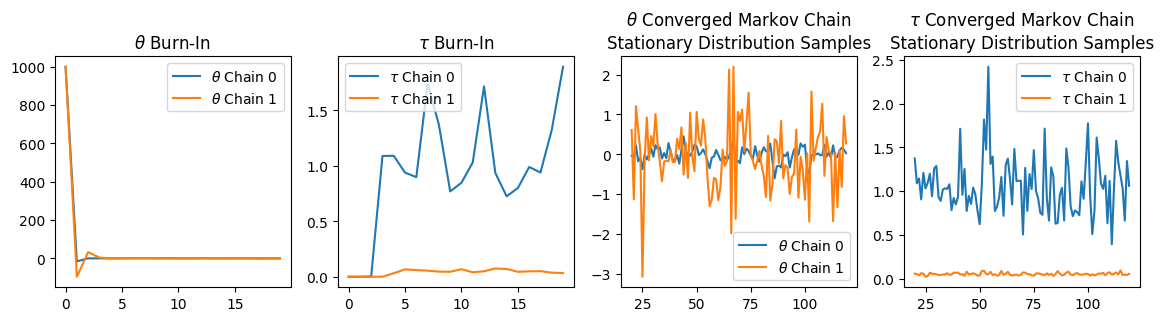

In [3]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

Bayesian Inference (Credible Interval)

For $N(0,1)$ Chain:

The 95% credible interval of mean for first chain is [-0.3476902290870838, 0.34790728213136507]
The 95% credible interval of standard deviation for first chain is [0.7492753715812139, 1.2415107129836893]


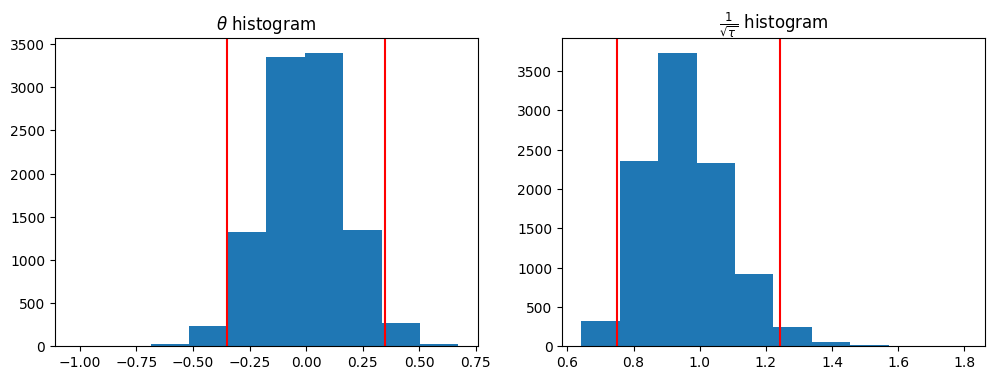

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].set_title("$\\theta$ histogram")
ax[1].set_title("$\\frac{1}{\\sqrt{\\tau}}$ histogram")

ax[0].hist(theta[0, burn:])
lower, upper = np.quantile(theta[0, burn:], (0.025, 0.975))
ax[0].axvline(lower, color="r")
ax[0].axvline(upper, color="r")
print(f"The 95% credible interval of mean for first chain is {[lower, upper]}")

ax[1].hist(1/tau[0, burn:]**0.5)
lower, upper = np.quantile(1/tau[0, burn:]**0.5, (0.025, 0.975))
ax[1].axvline(lower, color="r")
ax[1].axvline(upper, color="r")
print(f"The 95% credible interval of standard deviation for first chain is {[lower, upper]}")


For $N(0, 5^2)$ chain:

The 95% credible interval of mean for second chain is [-1.7783409707359414, 1.5029318244132799]
The 95% credible interval of standard variance for second chain is [3.525961315502816, 5.800116813087852]


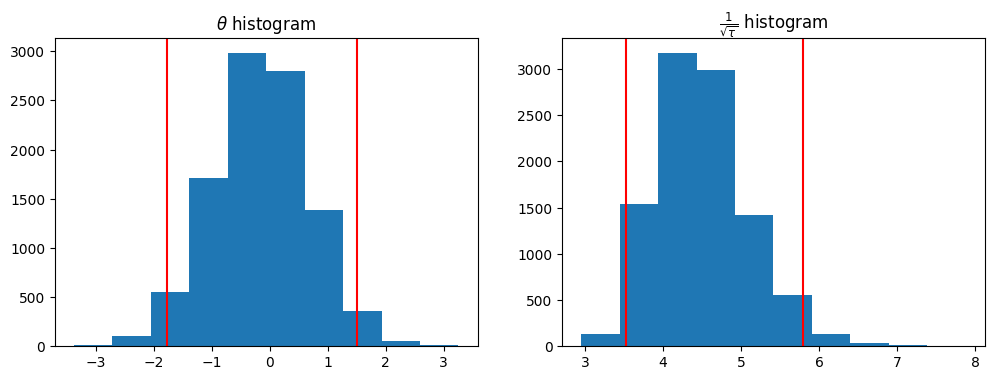

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].set_title("$\\theta$ histogram")
ax[1].set_title("$\\frac{1}{\\sqrt{\\tau}}$ histogram")

ax[0].hist(theta[1, burn:])
lower, upper = np.quantile(theta[1, burn:], (0.025, 0.975))
ax[0].axvline(lower, color="r")
ax[0].axvline(upper, color="r")
print(f"The 95% credible interval of mean for second chain is {[lower, upper]}")

ax[1].hist(1/tau[1, burn:]**0.5)
lower, upper = np.quantile(1/tau[1, burn:]**0.5, (0.025, 0.975))
ax[1].axvline(lower, color="r")
ax[1].axvline(upper, color="r")
print(f"The 95% credible interval of standard variance for second chain is {[lower, upper]}")


### Q2

Full conditional of $\theta$

\begin{align*}
    p(\theta | \tau, \mathbf{x}) & \propto f(\mathbf{x} | \theta, \tau) p(\theta) \\
        &= \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}\left(x_i-\theta\right)^2} \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}\left(\theta-\theta_0\right)^2} \\
        & \propto e^{-\frac{\tau}{2}\left(x_i-\theta\right)^2} e^{-\frac{\tau_0}{2}\left(\theta-\theta_0\right)^2} \\
        &= e^{\frac{\tau}{2}\sum_{i=1}^n \left(\theta^2-2\theta x_i+x_i^2\right)} e^{-\frac{\tau_0}{2}\left(\theta^2-2\theta\theta_0+\theta_0^2\right)} \\
        & \propto e^{-\frac{\tau}{2} \left(n\theta^2-2n\theta\bar{x}\right)} e^{-\frac{\tau_0}{2}\left(\theta^2-2\theta\theta_0\right)} \\
        &= e^{-\frac{n\tau}{2} \left(\theta^2-2\theta\bar{x}\right)} e^{-\frac{\tau_0}{2}\left(\theta^2-2\theta\theta_0\right)} \\
        &= e^{-\frac{1}{2}\left(\theta^2\left(n\tau+\tau_0\right) - 2\theta\left(n\tau\bar{x} + \tau_0\theta_0\right)\right)} \\
        & \propto e^{-\frac{n\tau+\tau_0}{2}\left[\theta^2 - 2\theta\left(\frac{n\tau\bar{x}+\tau_0\theta_0}{n\tau+\tau_0}\right) + \left(\frac{n\tau\bar{x}+\tau_0\theta_0}{n\tau+\tau_0}\right)^2\right]} &\text{(Adding last term to complete the square)} \\
        &= e^{-\frac{n\tau+\tau_0}{2}\left(\theta-\frac{n\tau\bar{x}+\tau_0\theta_0}{n\tau+\tau_0}\right)^2} \\
        & \sim N\left(\frac{n\tau\bar{x}+\tau_0\theta_0}{n\tau+\tau_0}, n\tau+\tau_0\right)
\end{align*}

Full conditional of $\tau$
\begin{align*}
    p(\tau|\theta,\mathbf{x}) & \propto f(\mathbf{x}|\theta,\tau)p(\tau) \\
        &\propto \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}\left(x_i-\theta\right)^2} \cdot \tau^{\frac{\alpha}{2}-1}e^{-\frac{\lambda}{2} \tau} \\
        &= \tau^{\frac{n}{2}} e^{-\frac{\tau}{2}\sum_{i=1}^n\left(x_i-\theta^2\right)} \cdot \tau^{\frac{\alpha}{2}-1}e^{-\frac{\lambda}{2}\tau} \\
        &= \tau^{\left(\frac{n}{2} + \frac{\alpha}{2}\right)-1} e ^{-\left[\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2+\frac{\lambda}{2}\right]\tau} \\
        & \sim \text{gamma}\left(\text{shape} = \frac{n}{2} + \frac{\alpha}{2}, \text{rate} = \frac{\lambda}{2} + \frac{1}{2}\sum_{i=1}^n(x_i-\theta)^2\right) \\
        & \sim \text{gamma}\left(\text{shape} = \frac{n}{2} + \frac{\alpha}{2}, \text{scale} = \frac{2}{\lambda+\sum_{i=1}^n(x_i-\theta)^2}\right)
\end{align*}

For the posterior of $\theta$, we can interpret the mean as the weighted average of the prior and the likelihood. The observed data will contribute $\tau$ units to the posterior mean, as shown in the weighted average in the mean. For the precision, having more data points means that the posterior distribution will have higher precision since the sample grows large, we are more certain about the parameters, and each data point contributes $\tau$ units to the precision as well.

For $\tau$, the shape grows proportional to the number of the data points, each data point contributes $\frac{1}{2}$ units to the shape parameter, and the rate (or scale) change proportionally to the value of $\sum_{i=1}^n(x_i-\theta)^2 = n\sigma^2 = n/\tau$, in other words, the rate (or scale) will depend the variance of the data points.

Updated version of Gibbs sampler. We will demonstrate 3 chains with different hyperparameters.

In [6]:
# loc is mean and scale is standard deviation
n = 30; m = 0; s = 2
theta_prior = [5, 10, 5]
tau_prior = [1, 5, 1]
lambda_prior = [2, 2, 5] 
alpha_prior = [2, 2, 100]
x = stats.norm(loc=m, scale=s).rvs(size=n)
C,G = 3,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a = n/2+alpha_prior[c]/2, scale = 2/(((x-theta[c,g-1])**2).sum()+lambda_prior[c])).rvs()
        theta[c,g] = stats.norm(loc=(n*tau[c,g]*x.mean() + tau_prior[c]*theta_prior[c])/(n*tau[c,g]+tau_prior[c]), \
                                scale=1/(tau[c,g]*n + tau_prior[c])**0.5).rvs()
                

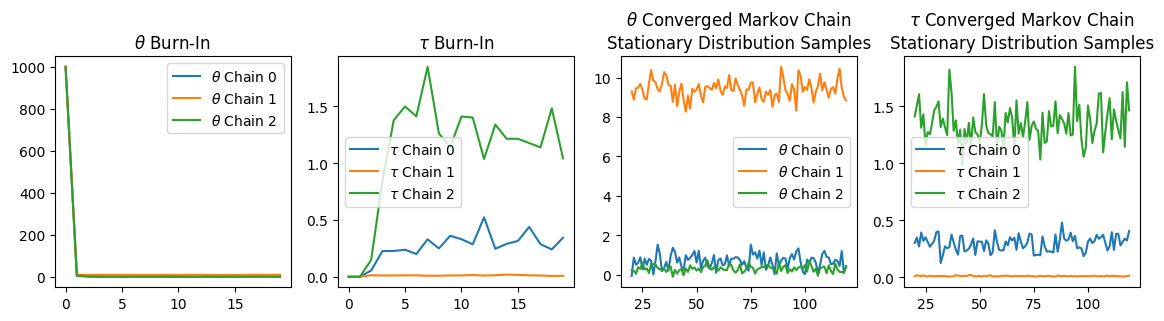

In [7]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

The 95% credible interval of mean in chain 0 = [0.08313064412903051, 1.4369606245325988]
The 95% credible interval of standard deviation in chain 0 = [1.4243974183948909, 2.4529741543628396]
The 95% credible interval of mean in chain 1 = [8.405981754648517, 10.225677968352226]
The 95% credible interval of standard deviation in chain 1 = [7.048141614163335, 12.02278154112852]
The 95% credible interval of mean in chain 2 = [0.028554245888431282, 0.645918903525172]
The 95% credible interval of standard deviation in chain 2 = [0.7737614432614571, 0.9913385371509936]


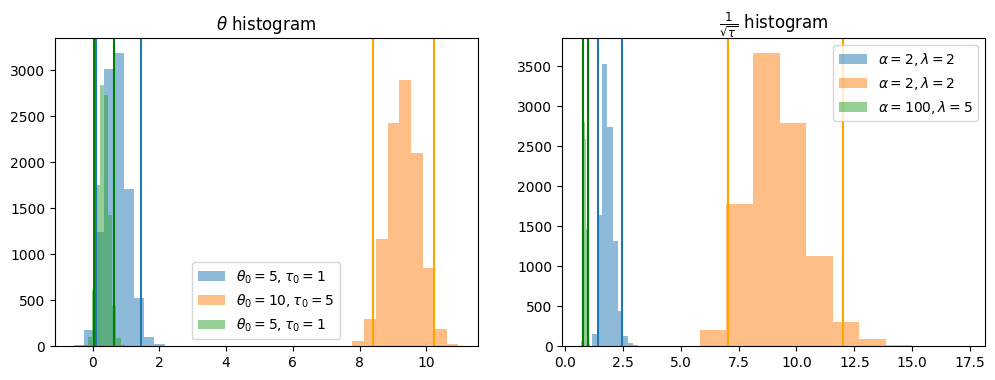

In [8]:
"""Chain 0 (Control chain)"""
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].set_title("$\\theta$ histogram")
ax[1].set_title("$\\frac{1}{\\sqrt{\\tau}}$ histogram")

ax[0].hist(theta[0, burn:], alpha = 0.5, label = f"$\\theta_0 = {theta_prior[0]}, \\tau_0 = {tau_prior[0]}$")
lower, upper = np.quantile(theta[0, burn:], (0.025, 0.975))
ax[0].axvline(lower)
ax[0].axvline(upper)
print(f"The 95% credible interval of mean in chain 0 = {[lower, upper]}")

ax[1].hist(1/tau[0, burn:]**0.5, alpha = 0.5, label = f"$\\alpha = {alpha_prior[0]}, \\lambda = {lambda_prior[0]}$")
lower, upper = np.quantile(1/tau[0, burn:]**0.5, (0.025, 0.975))
ax[1].axvline(lower)
ax[1].axvline(upper)
print(f"The 95% credible interval of standard deviation in chain 0 = {[lower, upper]}")

ax[0].hist(theta[1, burn:], alpha = 0.5, label = f"$\\theta_0 = {theta_prior[1]}, \\tau_0 = {tau_prior[1]}$")
lower, upper = np.quantile(theta[1, burn:], (0.025, 0.975))
ax[0].axvline(lower, color = "orange")
ax[0].axvline(upper, color = "orange")
print(f"The 95% credible interval of mean in chain 1 = {[lower, upper]}")

ax[1].hist(1/tau[1, burn:]**0.5, alpha = 0.5, label = f"$\\alpha = {alpha_prior[1]}, \\lambda = {lambda_prior[1]}$")
lower, upper = np.quantile(1/tau[1, burn:]**0.5, (0.025, 0.975))
ax[1].axvline(lower, color = "orange")
ax[1].axvline(upper, color = "orange")
print(f"The 95% credible interval of standard deviation in chain 1 = {[lower, upper]}")

ax[0].hist(theta[2, burn:], alpha = 0.5, label = f"$\\theta_0 = {theta_prior[2]}, \\tau_0 = {tau_prior[2]}$")
lower, upper = np.quantile(theta[2, burn:], (0.025, 0.975))
ax[0].axvline(lower, color = "green")
ax[0].axvline(upper, color = "green")
print(f"The 95% credible interval of mean in chain 2 = {[lower, upper]}")

ax[1].hist(1/tau[2, burn:]**0.5, alpha = 0.5, label = f"$\\alpha = {alpha_prior[2]}, \\lambda = {lambda_prior[2]}$")
lower, upper = np.quantile(1/tau[2, burn:]**0.5, (0.025, 0.975))
ax[1].axvline(lower, color = "green")
ax[1].axvline(upper, color = "green")
print(f"The 95% credible interval of standard deviation in chain 2 = {[lower, upper]}")

ax[0].legend(); ax[1].legend()

From the graphs shown above, we can see that the hyperparameters indicate our beliefs in the true distribution and the true value of our parameters. We can see that the true values are $\theta = 0$ and $\tau = 2$, then the posterior distribution will be pulled towards the true value of both $\theta$ and $\tau$.

Let the chain 0 (blue graph/lines) be the controlling chain, we can see that in chain 1, we have very strong belief that the true mean lies at $\theta = 10$, with high precision as well. This make the posterior lies around 9 (shift a bit to the left), and thus lead to high standard deviation as well (the mean is very far from the data points). 

For chain 2, we have a strong beliefs that precision of the data points are very high (the mean of precision is $\frac{100}{5} = 20$). This makes the data points contribute more to the posterior distribution. Therefore, the posterior of $\theta$ lies around 0 (shift a bit to the right due to the prior $\theta_0 = 5$) with very narrow credible interval, and the same goes for the values of standard deviation.

### Q3

The "proof" shown in the question indicates that if the prior is a proper distribution, then the posterior is also proper, which is proportional to the joint distribution, which stated by Bayes' Theorem. 

In low-dimensional distribution, we can obtain the posterior distribution by just ignoring all of the constant (or the terms that are not related to $\theta$) and then observe the rest of the mathematical expression to match with the our known distribution, and then we are able to obtain the desired result since each distribution has different mathematical expression (even after dropping the constant), otherwise it is the same distribution.

However, the technique is somehow "useless" if those posterior distributions are not in "well-known" form, or are written in high-dimensional form. Then, we need to sample from the obtained p.d.f. of the posterior distribution instead (there are many ways to do that, i.e., Gibbs sampler, Metropolis-Hasting, Monte-Carlo Markov Chain (MCMC), Accept-Reject method, etc.). We can sample from the p.d.f., and then obtain the histogram and perform the inference (credible interval) based on the sample, which make the normalizing constant even less important in Bayesian statistics because the shape (or the distribution) of the histrogram does not depend on those constants.

Therefore, all we need is to sample from the obtained posterior p.d.f., which can be done for any likelihood and (proper) prior, regardless of the dimensionality of the data.